# Fundamentals of Data Analysis  - Project 2020, by Leonard Curtin

<hr>

## Within the following jupyter notebook explanation and implementation of linear regression will occur.

Linear regression attemps to model the relationship between two variables by fitting a linear equation to the observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable [1].

A dataset under the heading of _powerproduction_ will be explored, this dataset is one of which explores the relationship between windspeed and power output. Speed is depicted as our explantory variable and power our dependent variable, such labels were given as in order for a certain amount of power to be generated, windspeeds must reach a specific capacity first i.e. power cannot be outputtted without the assistance fo the explantory variable speed.

<hr>

### Importing required libraries for analysis and reading the dataset

In [1]:
# Importation of python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# utilisation of pandas to read the data set
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


Upon initially viewing the contents of the dataframe i.e. the csv file. One may assume that an error has occured throughout the process of reading the dataframe. Such inferences may be assumed due to the contents of the dataframe expressing null values for the dependent variable of power. As depicted by the initial summary of the dataset, no change in the variable of power is conveyed when the variable of speed ranges from 0 to 25. Under such an assumption the dataset heeds further inspection.

<hr>

## Exploration of the dataset

As addressed above, our initial read of the dataset provided no insights related to the dependent variable of power. Further insepction of the dataset will occur in order to validate or contradict our initially held assumption.

In [3]:
df.head(21)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


Further insight into the dataset, may express the following suggestion that in order for any power to be generated the speed variable must reach a value of .3 or greater. As prior to this speed, no power was said to be generated or recorded within the dataset.

In [4]:
df.tail(20)

,speed,power
480,23.974,94.270
481,24.024,105.992
482,24.049,93.524
483,24.174,95.869
484,24.199,101.419
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223
489,24.399,95.117


In [5]:
# Data containing null power values at the end of dataset
powerzeroend = df[490:501]

### Depiction of the null powers values when speed is greater than 24.4

In [7]:
powerzeroend

,speed,power
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


The above code expresses a facet of the dataset, suggesting that when the independent variable of speed reaches a value greater than that of 24.4 the dependent variable of power is expressed as 0 i.e. no power is said to be generated or is recorded.

<hr>

Based on the insights gained through our initial inspection of the dataset, it is suggested that when conveying the dataset in the form of a plot. Several values of the dependant variable power will display a value of zero, this is suggested to occur at both the start and end of the plot. 

Depiction of the data, with an emphasis on highlighting the start and end null values of the dependant variable power.

In [8]:
# Displays plots in a greater size, improving legibility
plt.rcParams['figure.figsize'] = (20, 10)

In [9]:
# Slicing the data set, to select the null values
powerzerostart = df[0:5]
powerzeroend = df[490:499]

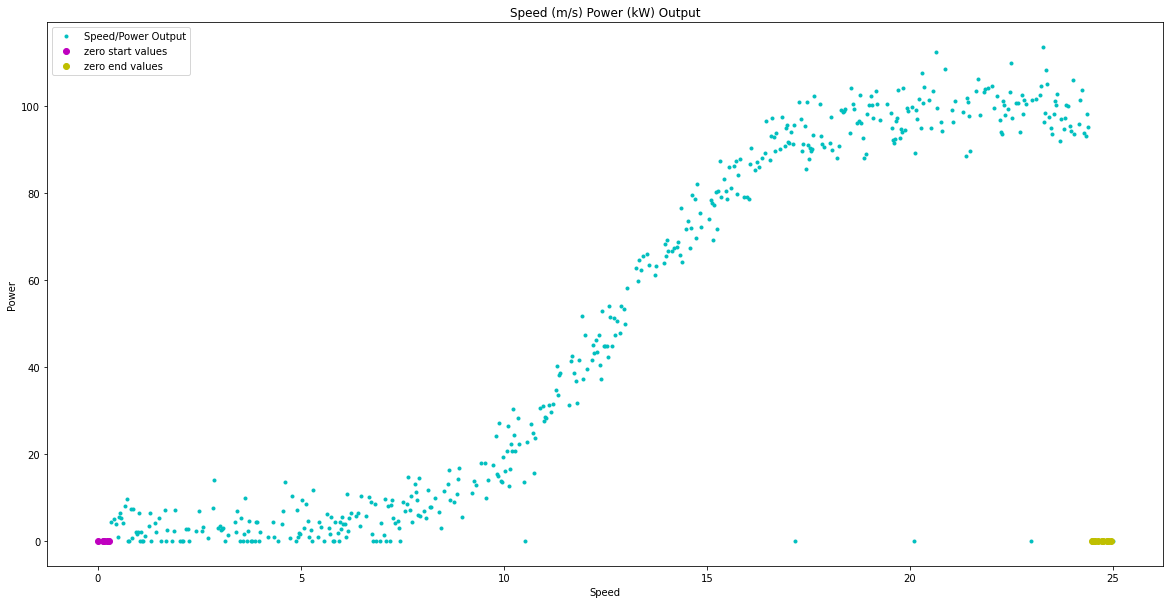

In [10]:
# Plotting the data set
plt.plot(df['speed'] , df['power'] , 'c.', label = 'Speed/Power Output');

# Plotting the null values, with colour to differentiate from non nul values at start and end of dataset 
plt.plot(powerzerostart['speed'] , powerzerostart['power'] , 'mo', label = 'zero start values');
plt.plot(powerzeroend['speed'] , powerzeroend['power'] , 'yo', label = 'zero end values');

# Addition of labels and legend
plt.xlabel('Speed');
plt.ylabel('Power');
plt.legend();
# Addition of title
plt.title('Speed (m/s) Power (kW) Output');

## Summary table of the Dataset

In [11]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


## Creation of a best fit line (Least-Squares Regression)

The most common method for fitting a regression line is the method of least-squares. This method calculates the best-fitting line for the observed data by minimizing the sum of the squares of the vertical deviations from each data point to the line (if a point lies on the fitted line exactly, then its vertical deviation is 0). Because the deviations are first squared, then summed, there are no cancellations between positive and negative values. [1]

Creating a best fit line on the dataset will occur through the usage of the method of least-squares [1] to map out a relationship between the variables of speed and power. Speed is expressed on the x axis and power on the y axis.

NumPy has a built in function that calculates a least squares polynomial fit on the variables i.e. numpy.polyfit [3] . A best fit line of the dataset, can be expresssed through the usage of the formula for the equation of a line.

Equation of a line formula: $ y=mx+c $

Where $m$ is equal to the slope of the line i.e. the increase in the $y$ value relative to increases applied to $x$

Where $c$ is equal to the y-intercept of the line i.e. the value of $y$ when $x$ is $0$

In [12]:
# Creation of coefficient variables i.e. best fit values or lowest cost for m and c
# They are outputted as arrays
coeffs1 = np.polyfit(df['speed'], df['power'], 1)
coeffs1

array([  4.91759567, -13.89990263])

NumPy.polyfit provides the best fit values for the variables m and c of the equation of a line formula for our dataset.

Implementation of the coefficients assigned to the variables m and c using numpy.polyfit

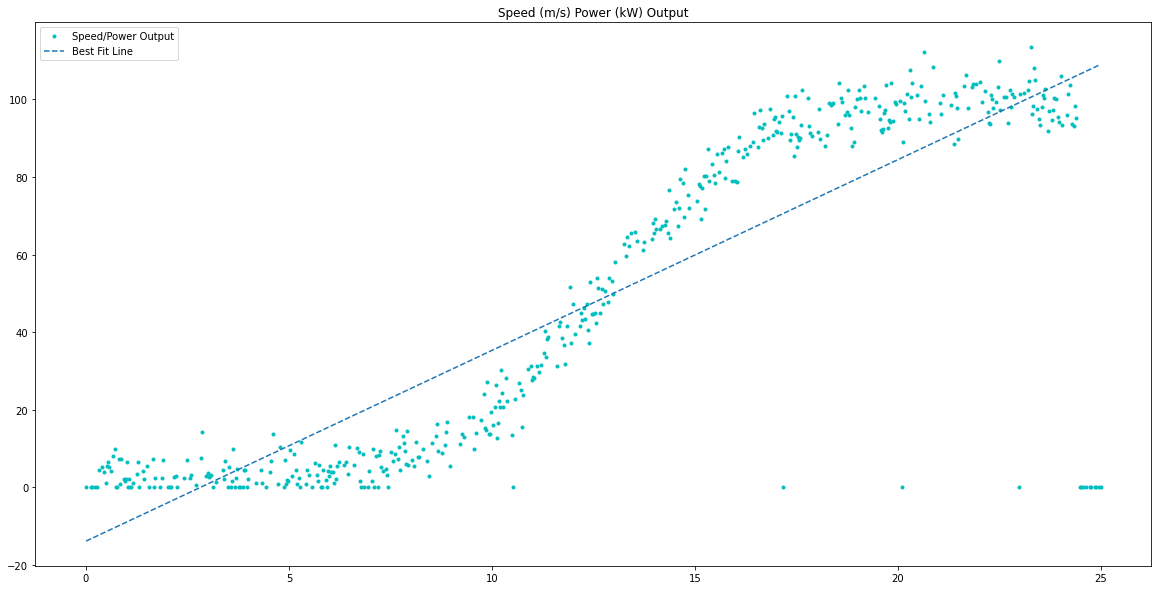

In [13]:
# Plotting the dataset and its best fit line
plt.plot(df['speed'], df['power'], 'c.', label='Speed/Power Output');
# Relative to the equation of a line formula i.e. y = m(x) + c
# Coeffs[0] = m, Coeffs[1] = c
plt.plot(df['speed'], coeffs1[0] * df['speed'] + coeffs1[1], '--', label='Best Fit Line')
plt.title('Speed (m/s) Power (kW) Output');
plt.legend();
plt.show();

The above plot utilises the following equation of a line formula
$ y = mx + c $

$ y = 4.91759567(X) + -13.89990263 $ *Where X is the values of the independent variable speed

Having created a best fit line for the dataset, it may be suggested that the dataset is not one of a linear nature. As throughout the course of the best fit line, particularly within the range of the x axis from 5 to 10, and from 15 to 20. The scatter plot is depicted as repelling itself against the best fit line. This is seen to occur where the most drastic curves of the dataset are depicted i.e. where a steady rise in power is conveyed, and additonally prior to where the dependent variable of power begins to plateau.

As one is now aware of the inaccuracies of the initial best fit line. Our dataset depicts curves when plotted, and in order to increase the accuracy of a best fit line, such curves should be conveyed within the creation of a best fit line.

## Striving to increase the accuracy of our best fit line through further methods of regression analysis

In order to improve the accuracy of our best fit line, implementation of polynomial [3] regression will occur. A series of plots will be plotted depicting an increase in the degree of each polynomial equation. Having previously plotted a first degree polynomial equation i.e. a straight line, that of which was acheived through connecting two points.

### Creation of a second degree polynomial

A second degree polynomial fits a curve to three points and is depicted using the following equation

$ y=ax^{2}+bx+c\; $

In [14]:
# Creation of best fit coefficient variables
coeffs2 = np.polyfit(df['speed'], df['power'], 2)
coeffs2

array([ -0.07021949,   6.67418543, -21.22684391])

In [15]:
# Assigning data for the x and y axis
x = df['speed']
y2 = coeffs2[0] * x**2 + coeffs2[1] * x + coeffs2[2]

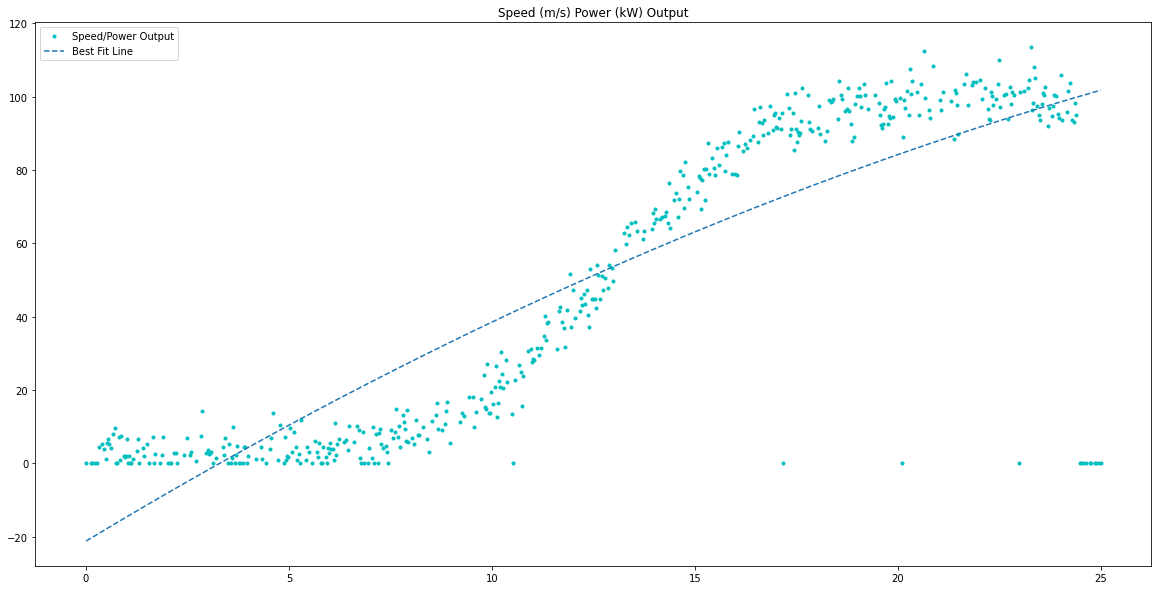

In [16]:
# Plotting the dataset and its best fit line
plt.plot(df['speed'], df['power'], 'c.', label='Speed/Power Output');

plt.plot(x, y2, '--', label='Best Fit Line')
plt.title('Speed (m/s) Power (kW) Output');
plt.legend();
plt.show();

Allowing for the best fit line to mimic the curves is what we intend to do. Utilsation of a second degree polynomial suggests that increasing the degree of the polynomial can allow the best fit line to mimic the dataset more accurately.

### Creation of a third degree polynomial

A third degree polynomial fits a curve to four points and is depicted using the following equation

$ y=ax^{3}+bx^{2}+cx+d\; $

In [17]:
# Creation of best fit coefficient variables
coeffs3 = np.polyfit(df['speed'], df['power'], 3)
coeffs3

array([ -0.05241927,   1.89485751, -12.94285866,  19.20130246])

In [18]:
# Assigning data for the x and y axis
x = df['speed']
y3 = coeffs3[0] * x**3 + coeffs3[1] * x**2 + coeffs3[2] * x + coeffs3[3]

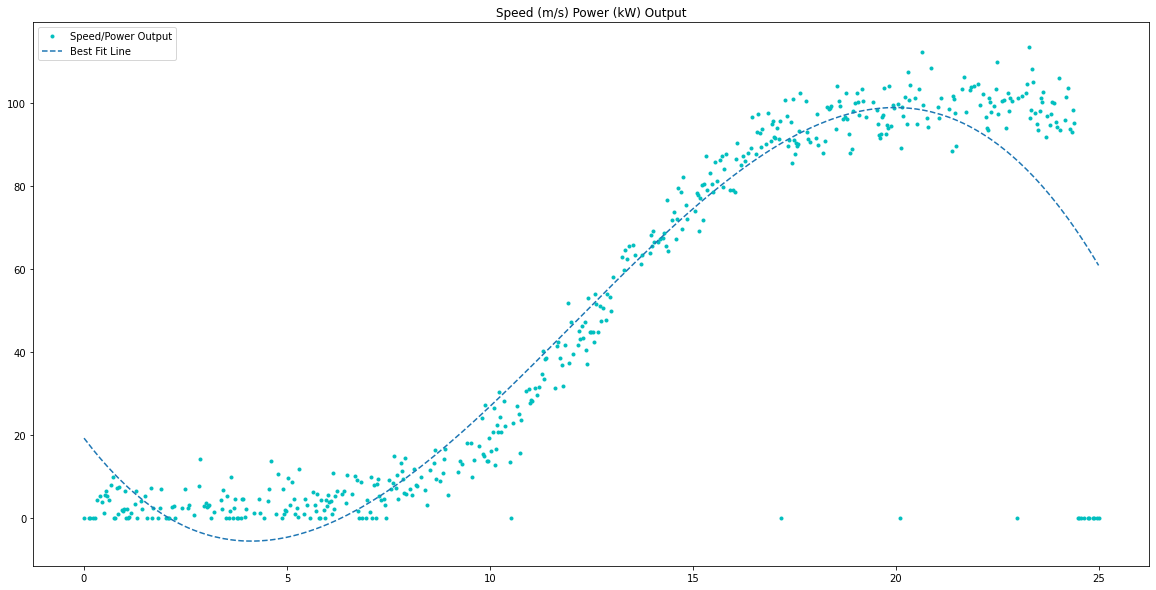

In [19]:
# Plotting the dataset and its best fit line
plt.plot(df['speed'], df['power'], 'c.', label='Speed/Power Output');
plt.plot(x, y3, '--', label='Best Fit Line')
plt.title('Speed (m/s) Power (kW) Output');
plt.legend();
plt.show();

Utilising a third degree polynomial equation has greatly allowed for the accuracy of the best fit line to match that of the dataset itself. in comparison to that of a second degree polynomial equation. However, aspects of inaccuracy are still expressed. Such instances of inaccuracy being that of the initital behaviour of the best fit line, when expressed as a thrid degree polynomial equation. Under the assumptions related to this of this particular best fit line, the initial values of the speed variable as suggested to start at a value greater than that of 0, however from reading in the dataset at an earlier stage, we know this not to be the case.

It may be suggested that, the reasoning behind the initial high starting value of the best line fit line has occurred in attempts to balance the line. Further viewing of this best fit line and the dataset as a whole, may propose that the best fit line reflects one of a symmetrical nature.

### Creation of a fourth degree polynomial

A fourth degree polynomial fits a curve to 5 points and is depicted using the following equation

$ y=ax^{4}+bx^{3}+cx^{2}+dx+e\; $

In [20]:
# Creation of best fit coefficient variables
coeffs4 = np.polyfit(df['speed'], df['power'], 4)
coeffs4

array([-2.91850218e-03,  9.31965285e-02, -4.33771545e-01, -1.66731072e-01,
        3.89358544e+00])

In [21]:
# Assigning data for the x and y axis
x = df['speed']
y4 = coeffs4[0] * x**4 + coeffs4[1] * x**3 + coeffs4[2] * x**2 + coeffs4[3] * x + coeffs4[4]

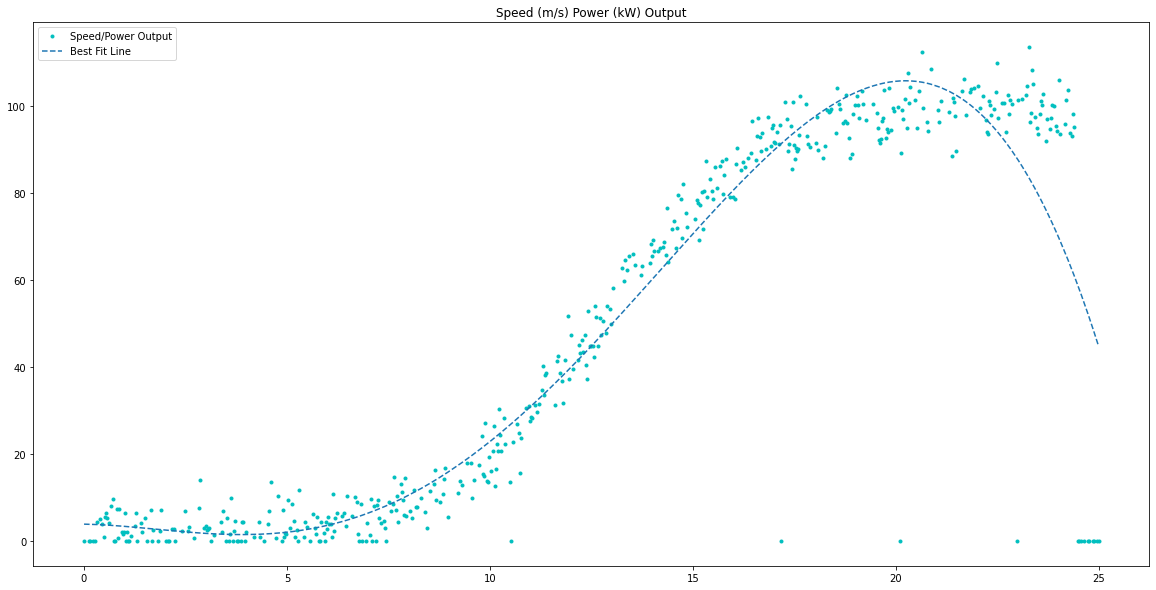

In [22]:
# Plotting the dataset and its best fit line
plt.plot(df['speed'], df['power'], 'c.', label='Speed/Power Output');
plt.plot(x, y4, '--', label='Best Fit Line')
plt.title('Speed (m/s) Power (kW) Output');
plt.legend();
plt.show();

Regarding the accuracy of the previous polynomial equations, a fourth degree polynomial appears to be the most accurate in creating a best fit line for the dataset. In contrast to the previous graph and its issues of inaccuracy related to its best fit line. The initial high starting point of its best fit line, has been removed through utilisation of a fourth degree polynomial equation to map the best fit line.

<br>
<hr>

## Reviewing the intrepretation of our regression analysis

The following code will create an overarching perspective of the changes that have been observed regarding the best fit line, when an additional degree has been added to the polynomial equation.

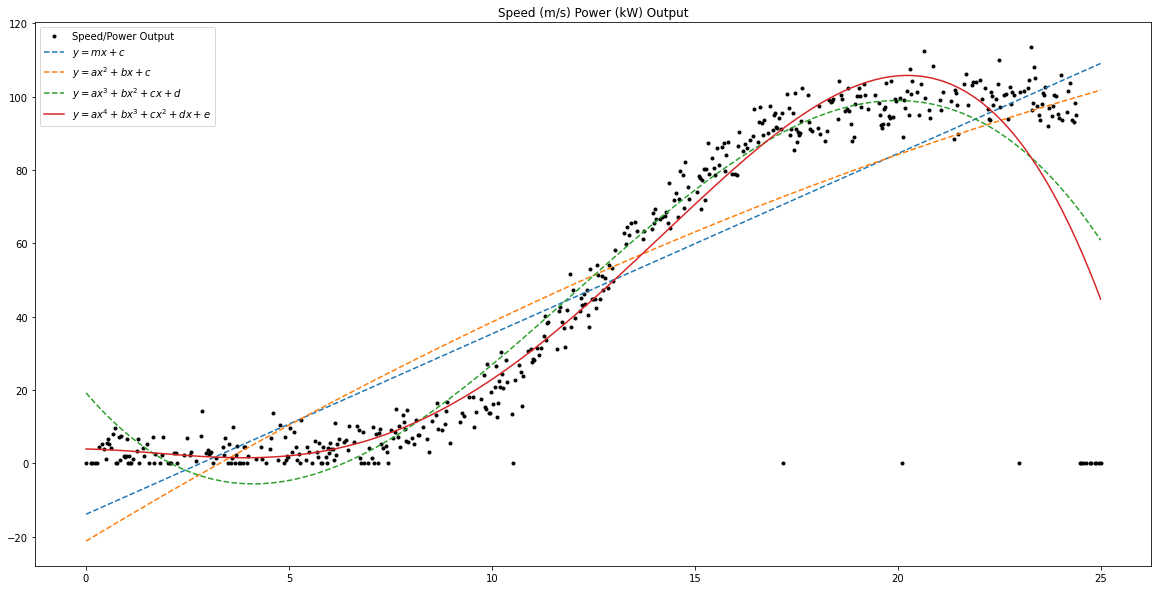

In [23]:
# Plotting the dataset and its best fit lines
plt.plot(df['speed'], df['power'], 'k.', label='Speed/Power Output');

plt.plot(df['speed'], coeffs1[0] * df['speed'] + coeffs1[1], '--', label='$ y=mx+c $')
plt.plot(x, y2, '--', label='$ y=ax^{2}+bx+c\; $')
plt.plot(x, y3, '--', label='$ y=ax^{3}+bx^{2}+cx+d\; $')
plt.plot(x, y4, '', label='$ y=ax^{4}+bx^{3}+cx^{2}+dx+e\; $')

plt.title('Speed (m/s) Power (kW) Output');
plt.legend();
plt.show();

Aware of the circumstance where any speed value greater than that of 24.4 is conveyed as having a power value of zero. Our best fit line using a fourth degree polynomial expresses this finding to quite an accurate extent i.e. as depicted by the steep sinking of the read line towards the null power outputs.

<hr>

## References

[1] Stat Yale.edu; linear regression, explanation of concept; http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm

[2] Wikipedia; linear regressio; https://en.wikipedia.org/wiki/Linear_regression#:~:text=In%20statistics%2C%20linear%20regression%20is,as%20dependent%20and%20independent%20variables).

[3] NumPy; numpy.polyfit; NumPy v1.19 Manual, NumPy Reference; https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

[4] Wikipedia; Polynomial regression; https://en.wikipedia.org/wiki/Polynomial_regression#:~:text=In%20statistics%2C%20polynomial%20regression%20is,nth%20degree%20polynomial%20in%20x.